## Regression lineaire Simple

In [7]:
# Régression Linéaire Simple
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

# Importer le dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Construction du modèle
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.predict([[15]])  

array([167181.3106341])

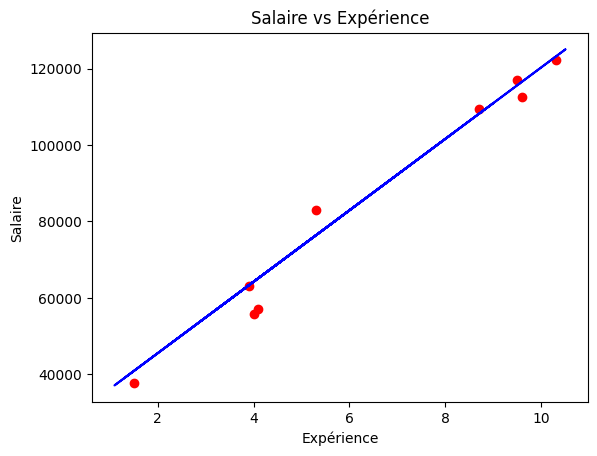

In [9]:
#ici on va voir les valeurs des parametres de notre equation
# y=ax+b
regressor.coef_
regressor.intercept_

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title(u'Salaire vs Expérience')
plt.xlabel(u'Expérience')
plt.ylabel(u'Salaire')
plt.show()

In [10]:
# evaluer notre modele 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse
rmse = np.sqrt(mse)
rmse


4834.260936361728

## Regression lineaire Multiple

In [2]:
# Importer les librairies
import numpy as np
import pandas as pd

# Importer le dataset
dataset = pd.read_csv('50_Startups.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Gérer les variables catégoriques
# on importe la classe pour appliquer la méthode des dummy variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        
         OneHotEncoder(), 
         [3]              
         )
    ],
   remainder='passthrough' 
)

X = transformer.fit_transform(X)

X = X.astype('int')

In [4]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Construction du modèle
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.predict(np.array([[0,1, 0, 130000, 140000, 300000]]))

array([157732.94960082])

In [5]:
#ici on va voir les valeurs des parametres de notre equation
# y=a1x1+a2x2 + a3x3+ a4x4+ a5x5+ b
#pour b c'est regressor.intercept_
regressor.intercept_
# pour a1 a2 a3 a4 a5 c est regressor.coef_
regressor.coef_

from sklearn.metrics import r2_score
#ici on va calculer r2 pour toutes les 6 variables
r2_score(y_test, y_pred)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse
rmse = np.sqrt(mse)
rmse


9138.007570984666

In [ ]:
#pour avoir une idée sur la performance du modele on verifier le mae pour training set et le mae pour testing set
y_pred_train = regressor.predict(X_train)

from sklearn.metrics import  mean_absolute_error

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_train
mae_test = mean_absolute_error(y_test, y_pred)
mae_test

In [6]:
#ici on va essayer de trouver un modele mais avec moins de variables, on va esayer 3 puis 4 puis 5
from sklearn.feature_selection import RFE

rfe_5 = RFE(regressor, n_features_to_select=5)
rfe_5.fit(X_train, y_train)
y_pred = rfe_5.predict(X_test)
print(r2_score(y_test, y_pred))

for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_5.support_[i], rfe_5.ranking_[i]))

rfe_4 = RFE(regressor, n_features_to_select=4)
rfe_4.fit(X_train, y_train)
y_pred = rfe_4.predict(X_test)
print(r2_score(y_test, y_pred))

for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe_4.support_[i], rfe_4.ranking_[i]))

0.94469682468278
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 2.000
Column: 5, Selected True, Rank: 1.000
0.9471684020352678
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 2.000


In [8]:
# Régression Linéaire Simple
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

# Importer le dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Construction du modèle
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

regressor.predict([[15]])  

array([167181.3106341])

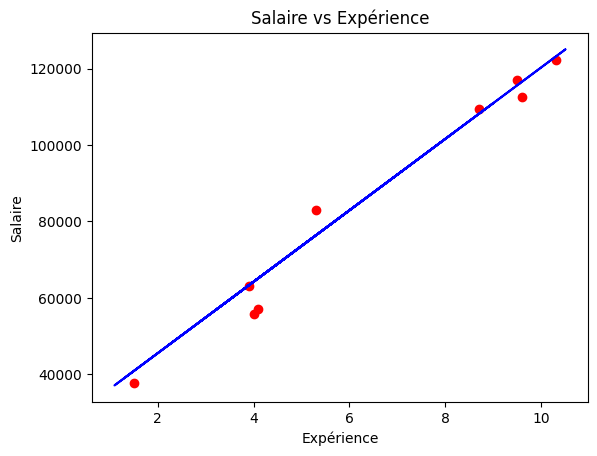

In [10]:
#ici on va voir les valeurs des parametres de notre equation
# y=ax+b
regressor.coef_
regressor.intercept_

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title(u'Salaire vs Expérience')
plt.xlabel(u'Expérience')
plt.ylabel(u'Salaire')
plt.show()

In [11]:
# evaluer notre modele 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse
rmse = np.sqrt(mse)
rmse


4834.260936361728

## Web Page for Prediction

In [1]:
# model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pickle

# Load the data
data = pd.read_csv('50_Startups.csv')

# Prepare the data
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

# Convert categorical variable 'State' to dummy variables
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
regressor = LinearRegression()
rfe = RFE(regressor, n_features_to_select=4)
rfe.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(rfe, file)

In [ ]:
from flask import Flask, request, render_template_string
import pickle
import numpy as np
import threading

app = Flask(__name__)

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# HTML template
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Profit Prediction</title>
</head>
<body>
    <h1>Profit Prediction</h1>
    <form action="/predict" method="post">
        <label for="RnD_Spend">R&D Spend:</label>
        <input type="text" id="RnD_Spend" name="RnD_Spend"><br><br>
        <label for="Administration">Administration:</label>
        <input type="text" id="Administration" name="Administration"><br><br>
        <label for="Marketing_Spend">Marketing Spend:</label>
        <input type="text" id="Marketing_Spend" name="Marketing_Spend"><br><br>
        <label for="State">State:</label>
        <select id="State" name="State">
            <option value="New York">New York</option>
            <option value="California">California</option>
            <option value="Florida">Florida</option>
        </select><br><br>
        <input type="submit" value="Predict">
    </form>
    {% if prediction_text %}
        <h2>{{ prediction_text }}</h2>
    {% endif %}
</body>
</html>
"""

@app.route('/')
def home():
    return render_template_string(html_template)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        RnD_Spend = float(request.form['RnD_Spend'])
        Administration = float(request.form['Administration'])
        Marketing_Spend = float(request.form['Marketing_Spend'])
        State = request.form['State']

        # Convert State to dummy variables
        state_dummies = [0, 0]
        if State == 'California':
            state_dummies = [1, 0]
        elif State == 'Florida':
            state_dummies = [0, 1]

        features = np.array([RnD_Spend, Administration, Marketing_Spend] + state_dummies).reshape(1, -1)
        prediction = model.predict(features)

        return render_template_string(html_template, prediction_text='Predicted Profit: ${:.2f}'.format(prediction[0]))
    except Exception as e:
        return render_template_string(html_template, prediction_text=f"Error: {str(e)}")

# Run the Flask app in a separate thread
def run_app():
    app.run(debug=True, use_reloader=False)

thread = threading.Thread(target=run_app)
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [06/Dec/2024 11:53:51] "GET / HTTP/1.1" 200 -
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
127.0.0.1 - - [06/Dec/2024 11:53:59] "POST /predict HTTP/1.1" 200 -


![image.png](image.png)